In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Reading 1 million rows 
properties_df = pd.read_csv("../input/properties_2016.csv" ,nrows=1000000,low_memory=False)

properties_df.shape

(1000000, 58)

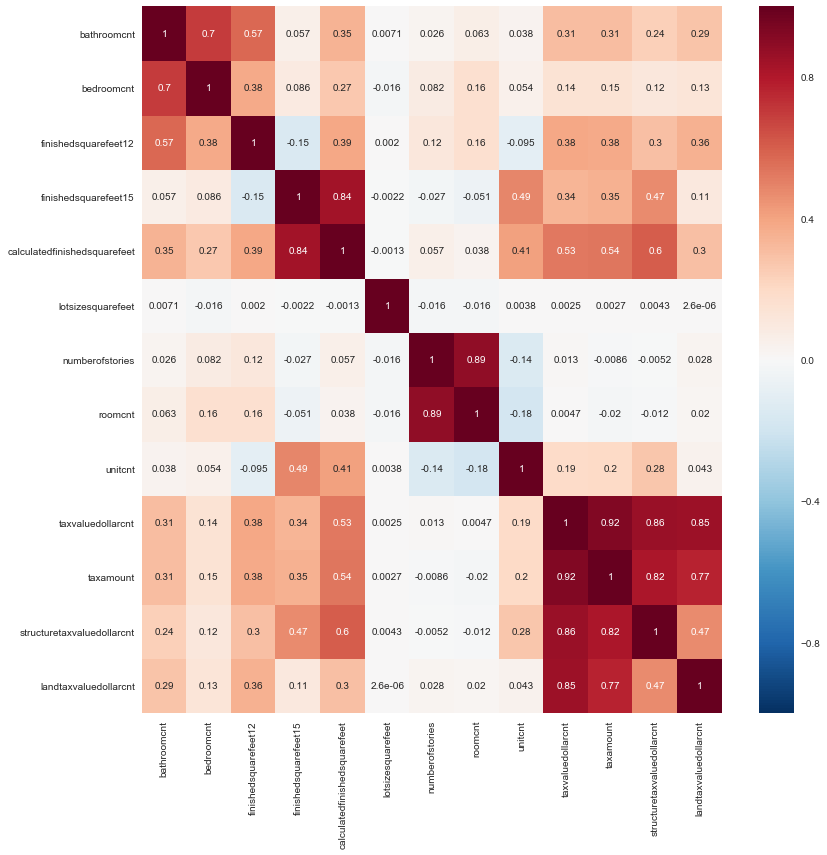

In [2]:
prop_df = properties_df.copy()
# For calculating Person coefficient putting Null values as 0
prop_df.fillna(0,inplace=True)

########## Question 1. Pearson Co-Relation Analysis ############

#Created an array of ineresting features on which the Pearson coefficient will be calculated
data = np.array([prop_df['bathroomcnt'],prop_df['bedroomcnt'],prop_df['finishedsquarefeet12'],prop_df['finishedsquarefeet15'],prop_df['calculatedfinishedsquarefeet'],prop_df['lotsizesquarefeet'],prop_df['numberofstories'],prop_df['roomcnt'],prop_df['unitcnt'],prop_df['taxvaluedollarcnt'],prop_df['taxamount'],prop_df['structuretaxvaluedollarcnt'],prop_df['landtaxvaluedollarcnt']])
#data = prop_df[['bathroomcnt','bedroomcnt','finishedsquarefeet12','finishedsquarefeet15','calculatedfinishedsquarefeet','lotsizesquarefeet','numberofstories','roomcnt','unitcnt','taxvaluedollarcnt','taxamount','structuretaxvaluedollarcnt','landtaxvaluedollarcnt']].copy()
cols = ['bathroomcnt','bedroomcnt','finishedsquarefeet12','finishedsquarefeet15','calculatedfinishedsquarefeet','lotsizesquarefeet','numberofstories','roomcnt','unitcnt','taxvaluedollarcnt','taxamount','structuretaxvaluedollarcnt','landtaxvaluedollarcnt']
corr = np.corrcoef(data)
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True ,xticklabels=cols , yticklabels=cols)

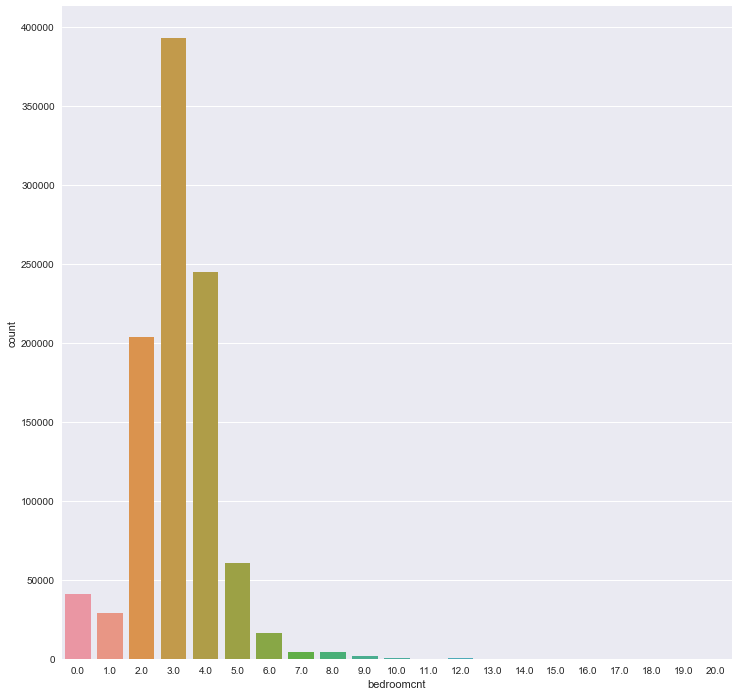

In [3]:
#From the heatmap we infer that features like taxamount,taxvaluedollarcnt,structuredtaxvaluedollarcnt,landtaxvaluedollarcnt,
#caluclatedfinishedsquarefeet and finishedsquarefeet12 are the most co-related variables and we will explore them further and see how they fare with the 
#models

#Negative co-relation is of lotsizesquarefeet feature with the other features

######### Question 2. Informative Plots ##################

#a.Count Plot

plt.figure(figsize = (12,12))
sns.countplot(x="bedroomcnt", data=prop_df)

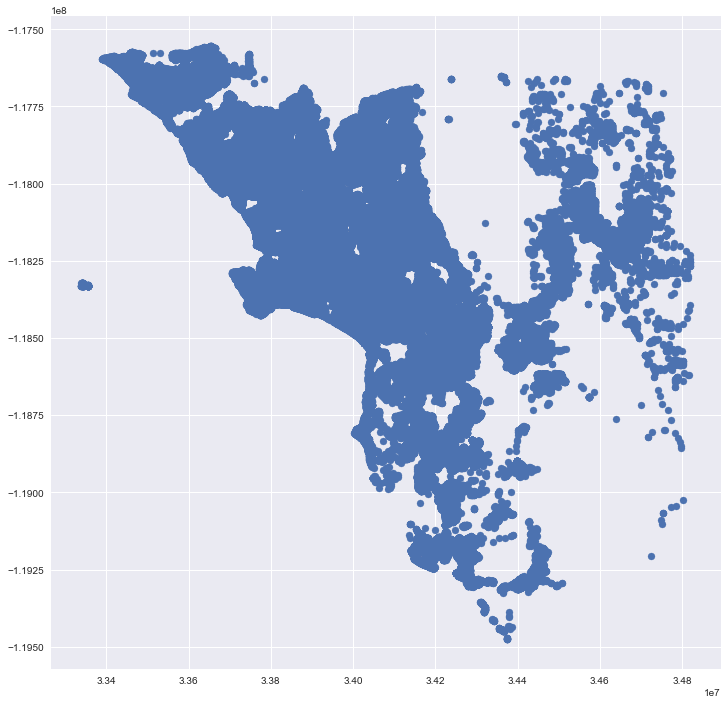

In [4]:
#From the above graph we infer that out of the parcels sold majority of them have 3 bedrooms , in our sample set almost 40000  parcels sold with 3 bedrooms.
#This indicate that 3 bedroom parcels are the most preferred among buyers.

#b.Scatter Plot

plt.figure(figsize = (12,12))
plt.scatter(x='latitude',y='longitude',data=prop_df)

(1900, 2020)

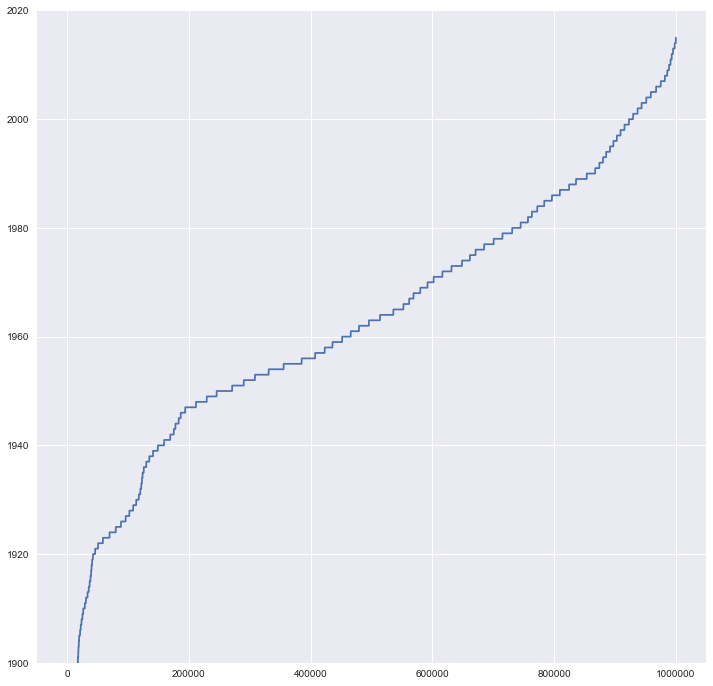

In [5]:
#Another interesting pair of variables are latitude and longitude of the parcel lot. When mapped as scatter plot they roughly show the
#area of the region on map where al these parcels belong to. This area resembles the Los Angeles,California bay area location , thus confirming 
#that the properties mentioned confirm to their latitude and longitude values with a few exceptions.

#c. Line chart 

plt.figure(figsize = (12,12))
plt.plot(np.sort(prop_df['yearbuilt']))
plt.ylim([1900,2020])

In [6]:
#The above charts the number of parcels built in a year from 1900-2020. We can see that majoriy of the plots were built after 1940.


#Lets evaluate the train csv file
training_df = pd.read_csv("../input/train_2016_v2.csv", low_memory=False)
# merging train and properties files
train_df = pd.merge(training_df,properties_df,how='left' , on='parcelid')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


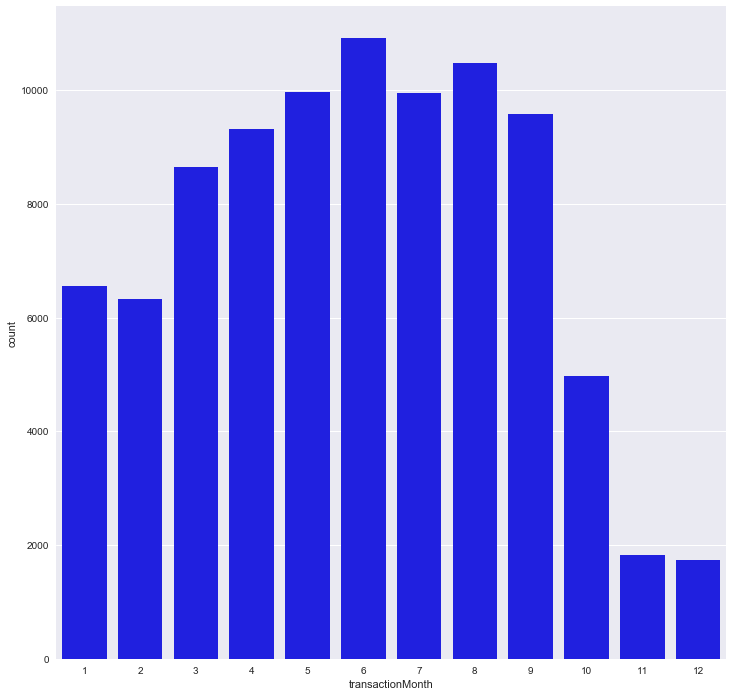

In [7]:
#d. Bar plot

#Extracting transaction month from transaction date
train_df['transactionMonth'] = pd.DatetimeIndex(train_df['transactiondate']).month
plt.figure(figsize= (12,12))
sns.countplot(x="transactionMonth",data=train_df,color='blue')


In [8]:
#The above chart shows that most of the parcels were sold before October. This could be due to the fact that during winters
#people dont engage in house hunting and purchasig activitie or maybe the activties were not recorded correctly for Ocober as there
#were not enough staff to work on it

#As the properties file has a lot of Null values we will replace them with the means of the corresponding feature for further calculation
mean_values = train_df.mean(axis=0)
train_new_df = train_df.fillna(mean_values, inplace=True)

# checking thhe types of all columns
train_new_df.dtypes



parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


C:\Users\vamsidhar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\vamsidhar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


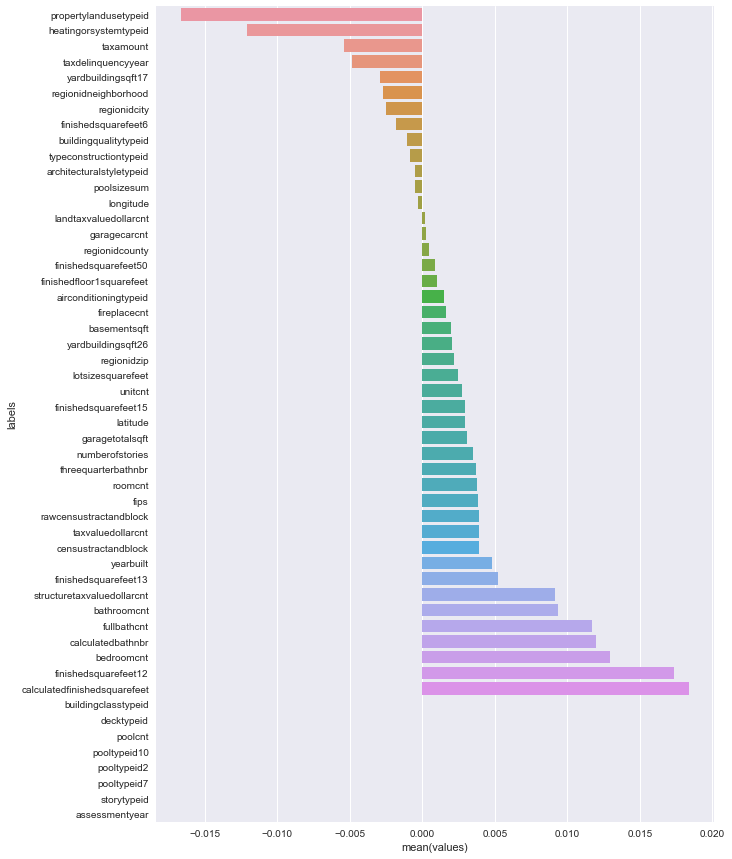

In [9]:
## From the above table we see majority of values are in float64 type , hence while finding the relation with log error we will 
# consider only the float64 dtypes

#Finding the pearson coeficient of all the features with log error
#e. Bar Plot

features = []
corrvalue = []
for columns in train_new_df.columns:
    if columns not in ['logerror'] and train_new_df[columns].dtype == 'float64':
        features.append(columns)
        
        corrvalue.append(np.corrcoef(train_new_df[columns].values,train_new_df.logerror.values)[0,1])
width = 0.9
corr_df = pd.DataFrame({'labels':features, 'values':corrvalue})
corr_df = corr_df.sort_values(by='values')
plt.figure(figsize = (10,15))

sns.barplot(x='values',y='labels',data=corr_df)


In [10]:
#As expected few of the features like finishedsquarefeet12 , structuredtaxvaluedollarcnt , calculatedbathnbr have higher 
#relation with the log error. But suprisingly taxamounts have negative correlation with log eror which is contradicting our earlier observation.
#This could be due to the mean values that were filled for all nulls.


####### Question 3. Linear Regression Model #####################################

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#We will take the best features from the properties based on the co relation graphs i.e heat map and bar plot plotted above
train = train_new_df.copy()
train = train.filter(['calculatedfinishedsquarefeet','finishedsquarefeet12','bedroomcnt','calculatedbathnbr','fullbathcnt','bathroomcnt','structuretaxvaluedollarcnt'])
# Taking train dataset as 89275 rows and remaining 1000 rows are test dataset
train_Y = train_new_df['logerror'].values[:89275]
train_X = train[:89275]
test_X = train[89275:]
test_Y = train_new_df['logerror'].values[89275:]

linear_reg=linear_model.LinearRegression()

linear_reg.fit(train_X,train_Y)
test_Y_predict=linear_reg.predict(test_X)

# The coefficients
print('Coefficients: \n', linear_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_Y, test_Y_predict))
# Explained variance score
print('Variance score: %.2f' % r2_score(test_Y, test_Y_predict))

Coefficients: 
 [  4.97282158e-06   2.26600024e-06   2.10792768e-03   8.09088832e-03
   5.67760985e-04  -1.10363672e-02  -5.74476220e-09]
Mean squared error: 0.03
Variance score: -0.01


In [11]:
#The Linear model gave better coefficients , the mean sqaure error and variance score are fine for the data used.

#Following table shows the features and their coefficients
features_df = pd.DataFrame({'Features':test_X.columns.values, 'Coefficients':linear_reg.coef_})

In [12]:
features_df

,Coefficients,Features
0,4.972822e-06,calculatedfinishedsquarefeet
1,2.266000e-06,finishedsquarefeet12
2,2.107928e-03,bedroomcnt
3,8.090888e-03,calculatedbathnbr
4,5.677610e-04,fullbathcnt
5,-1.103637e-02,bathroomcnt
6,-5.744762e-09,structuretaxvaluedollarcnt


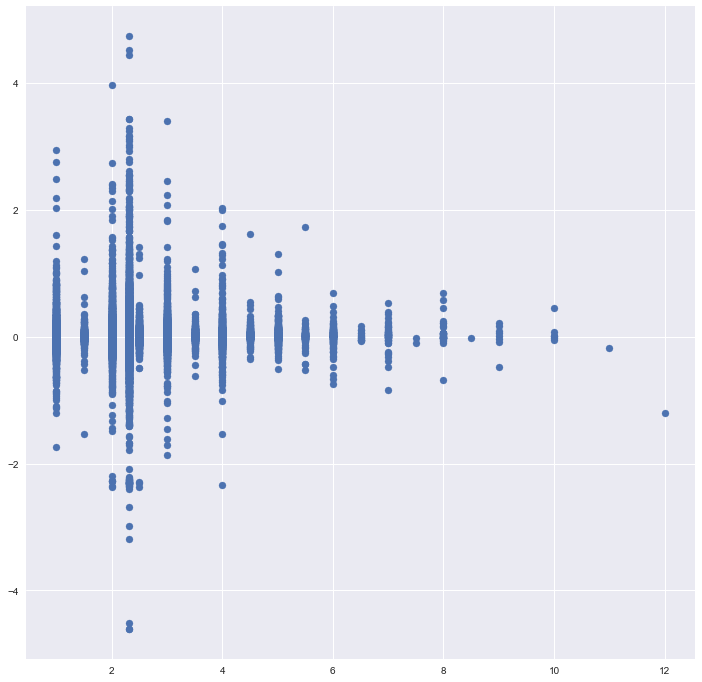

In [13]:
#From the table it is clear that calculatedbathnbr has the maximum co-relation with logerror. Lets plot a scatter map for this feature

plt.figure(figsize = (12,12))
plt.scatter(train_df.calculatedbathnbr,train_df.logerror)


In [14]:
#The scatter plot indicates that log error narrows down with increase in calculatedbathnbr thus justifying their linear relationship.
#Hence based on linear model calculatedbathnbr seems to be the most important feature so far.

############### Question 4. Random Forest Regression Model #############################################
#To understand the data set more lets first evaluate al the mising values

properties_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [15]:
missing_values = properties_df.isnull().sum()
missing_values

parcelid                             0
airconditioningtypeid           726690
architecturalstyletypeid        998025
basementsqft                    999464
bathroomcnt                          8
bedroomcnt                           3
buildingclasstypeid             995720
buildingqualitytypeid           348070
calculatedbathnbr                39675
decktypeid                      994261
finishedfloor1squarefeet        931156
calculatedfinishedsquarefeet     14760
finishedsquarefeet12             88764
finishedsquarefeet13            997333
finishedsquarefeet15            936051
finishedsquarefeet50            931156
finishedsquarefeet6             992611
fips                                 0
fireplacecnt                    894624
fullbathcnt                      39675
garagecarcnt                    703049
garagetotalsqft                 703049
hashottuborspa                  976824
heatingorsystemtypeid           392310
latitude                             0
longitude                

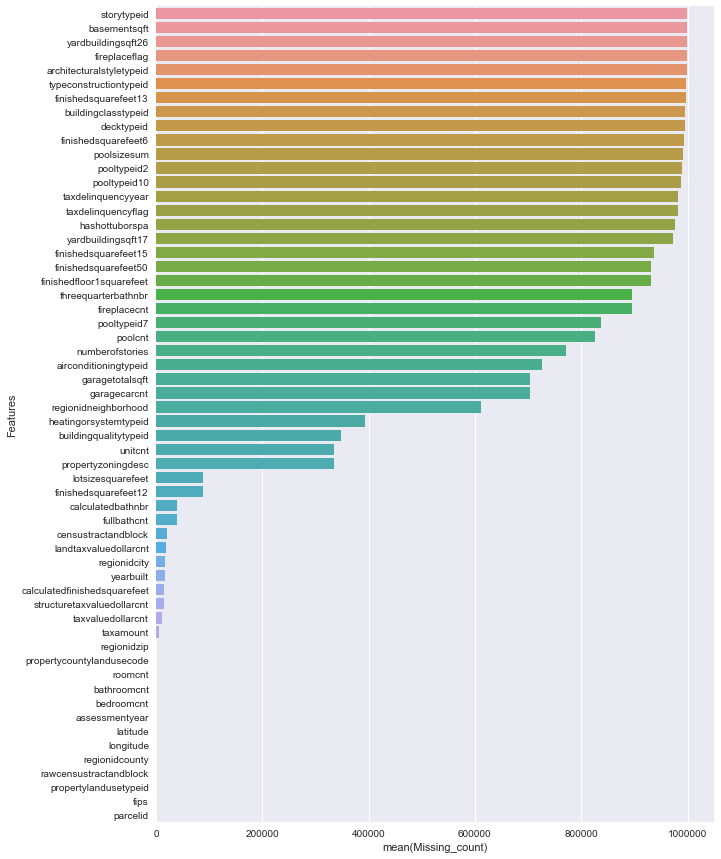

In [16]:
#Plotting a grahph of features with the missing count
missing_sorted = missing_values.sort_values(ascending=False).to_frame().reset_index()
missing_sorted.columns = ['Features','Missing_count']
plt.figure(figsize = (10,15))
sns.barplot(x="Missing_count",y="Features",data=missing_sorted)

In [17]:
#The data frame has a lot of missing values mostly with categorical fields , however the fields that we were interested n our linear 
#model have less missing values.

#We will now create a merged dataframe for the Random Forest Regression

train2_df = pd.merge(training_df,properties_df,how='left' , on='parcelid')
train2_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Will fill the missing values with median value for all the columns

mean = train2_df.mean(axis=0)
train_new_df2 = train2_df.fillna(mean, inplace=True)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

train = train_new_df2.copy()
# We will drop the features which had higher frequency of missing values along with the columns of train df for the test df
train = train.drop(['parcelid', 'logerror', 'transactiondate','hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],axis =1)
train_Y = list(train_new_df['logerror'].values[:89275])
train_X = train[:89275]
test_X = train[89275:]
test_Y = train_new_df['logerror'].values[89275:]

train_X.head()


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,1.808287,7.544444,670.571429,2.275342,3.035616,4.0,5.57294,2.305007,66.0,1347.71397,...,384.393939,1968.441024,1.450152,179590.661298,456776.388163,2015.0,277879.333102,5974.737254,13.309154,6.049069e+13
1,1.808287,7.544444,670.571429,3.500000,4.000000,4.0,5.57294,3.500000,66.0,1347.71397,...,384.393939,2014.000000,1.450152,346458.000000,585529.000000,2015.0,239071.000000,10153.020000,13.309154,6.049069e+13
2,1.808287,7.544444,670.571429,2.275342,3.035616,4.0,5.57294,2.305007,66.0,1347.71397,...,384.393939,1968.441024,1.450152,179590.661298,456776.388163,2015.0,277879.333102,5974.737254,13.309154,6.049069e+13
3,1.808287,7.544444,670.571429,2.275342,3.035616,4.0,5.57294,2.305007,66.0,1347.71397,...,384.393939,1968.441024,1.450152,179590.661298,456776.388163,2015.0,277879.333102,5974.737254,13.309154,6.049069e+13
4,1.808287,7.544444,670.571429,2.275342,3.035616,4.0,5.57294,2.305007,66.0,1347.71397,...,384.393939,1968.441024,1.450152,179590.661298,456776.388163,2015.0,277879.333102,5974.737254,13.309154,6.049069e+13


In [20]:
#Training the Random Forest regressor
reg = RandomForestRegressor(n_jobs=2, random_state=0)
reg.fit(train_X,train_Y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [21]:
#predicting the log error values
test_Y_reg = reg.predict(test_X)
# The coefficients
print('Coefficients: \n', reg.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_Y, test_Y_reg))
# Explained variance score
print('Variance score: %.2f' % r2_score(test_Y, test_Y_reg))

Coefficients: 
 [  4.92579735e-03   7.93145744e-05   3.89433752e-04   9.11137016e-03
   1.92214429e-02   0.00000000e+00   8.80428209e-03   9.56128643e-03
   0.00000000e+00   4.21390099e-03   5.81492509e-02   5.18488855e-02
   4.75128030e-05   1.20793635e-02   2.88769526e-03   2.49320263e-03
   2.49125429e-04   1.82586206e-03   6.10954283e-03   2.35592060e-03
   7.75965594e-03   7.26117184e-03   9.46197238e-02   7.60142335e-02
   6.68376951e-02   0.00000000e+00   7.56063747e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.06768071e-02   2.66631642e-02
   2.98302408e-02   2.81276501e-03   3.68919022e-02   5.48976560e-02
   2.84961858e-03   0.00000000e+00   3.35738072e-03   1.95342960e-05
   4.81633837e-03   2.43830597e-03   1.85248144e-04   5.83285028e-02
   1.94770034e-03   7.55714207e-02   6.51642729e-02   0.00000000e+00
   6.94758099e-02   7.37474373e-02   7.40830875e-03   2.53158523e-02]
Mean squared error: 0.03
Variance score: -0.08


In [22]:
#Suprsingly the mean square error is the same for Linear and Random Forest Regression model .However the coeeficients are better now

#Creating table for Features and Corelation coefficients
features_df = pd.DataFrame({'Features':test_X.columns.values, 'Coefficients':reg.feature_importances_})
features_df

,Coefficients,Features
0,0.004926,airconditioningtypeid
1,0.000079,architecturalstyletypeid
2,0.000389,basementsqft
3,0.009111,bathroomcnt
4,0.019221,bedroomcnt
5,0.000000,buildingclasstypeid
6,0.008804,buildingqualitytypeid
7,0.009561,calculatedbathnbr
8,0.000000,decktypeid
9,0.004214,finishedfloor1squarefeet


In [23]:
#Further filtering the dataset with the highest corealtions from the above table and training the model again

train = train.filter(['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude','lotsizesquarefeet','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount'])
train_Y = list(train_new_df['logerror'].values[:89275])
train_X = train[:89275]
test_X = train[89275:]
test_Y = train_new_df['logerror'].values[89275:]
train_X.head()

,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,1769.58839,1741.897046,3.400633e+07,-1.181982e+08,28597.334039,1968.441024,179590.661298,456776.388163,277879.333102,5974.737254
1,2263.00000,2263.000000,3.366812e+07,-1.176776e+08,3643.000000,2014.000000,346458.000000,585529.000000,239071.000000,10153.020000
2,1769.58839,1741.897046,3.400633e+07,-1.181982e+08,28597.334039,1968.441024,179590.661298,456776.388163,277879.333102,5974.737254
3,1769.58839,1741.897046,3.400633e+07,-1.181982e+08,28597.334039,1968.441024,179590.661298,456776.388163,277879.333102,5974.737254
4,1769.58839,1741.897046,3.400633e+07,-1.181982e+08,28597.334039,1968.441024,179590.661298,456776.388163,277879.333102,5974.737254


In [24]:
reg = RandomForestRegressor(n_jobs=2, random_state=0)
reg.fit(train_X,train_Y)
test_Y_reg = reg.predict(test_X)
# The coefficients
print('Coefficients: \n', reg.feature_importances_)
# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y, test_Y_reg))
# Explained variance score
print('Variance score: %.2f' % r2_score(test_Y, test_Y_reg))

Coefficients: 
 [ 0.08288709  0.07149072  0.11322801  0.11257555  0.10661124  0.08729621
  0.11661272  0.10295979  0.088936    0.11740269]
Mean squared error: 0.027718
Variance score: -0.08


In [25]:
#This time the coefficients again have improved but mean sqaure error is the same

features_df = pd.DataFrame({'Features':test_X.columns.values, 'Coefficients':reg.feature_importances_})
features_df

,Coefficients,Features
0,0.082887,calculatedfinishedsquarefeet
1,0.071491,finishedsquarefeet12
2,0.113228,latitude
3,0.112576,longitude
4,0.106611,lotsizesquarefeet
5,0.087296,yearbuilt
6,0.116613,structuretaxvaluedollarcnt
7,0.102960,taxvaluedollarcnt
8,0.088936,landtaxvaluedollarcnt
9,0.117403,taxamount


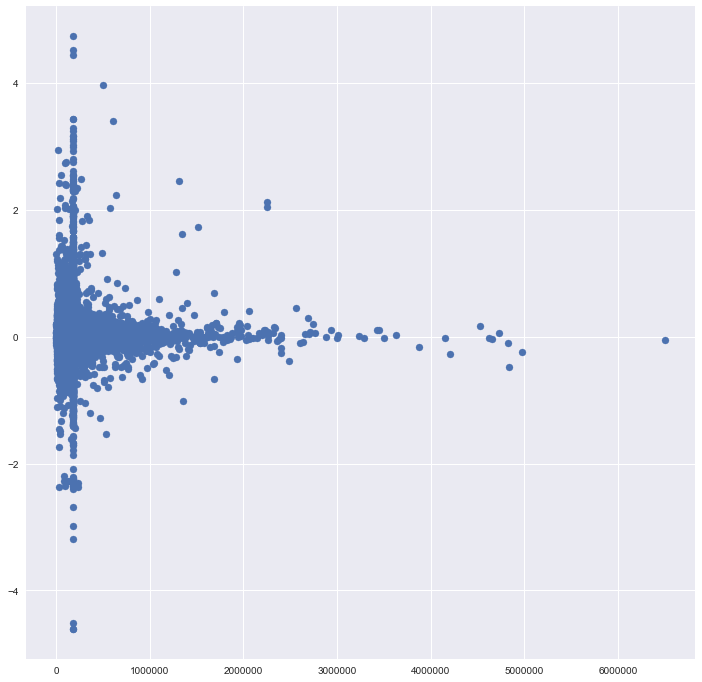

In [26]:
# Plotting the highest corelated features with log error

plt.figure(figsize = (12,12))
plt.scatter(train2_df.structuretaxvaluedollarcnt,train2_df.logerror)


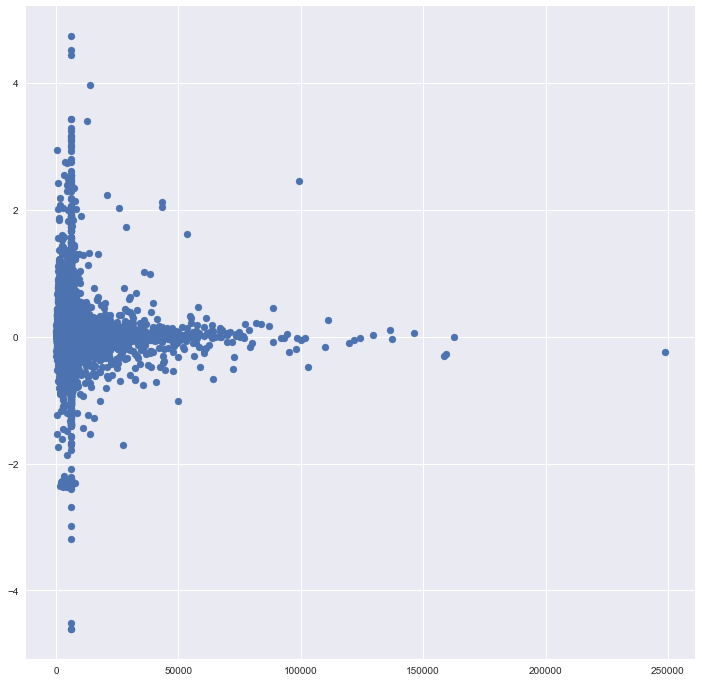

In [27]:
plt.figure(figsize = (12,12))
plt.scatter(train2_df.taxamount,train2_df.logerror)

In [28]:
#Both the above plots satisfy the high corelation of these features with the log error

#### K Nearest Neighbour Model ##################
# Will explore K nearesrt Neighbour model , as its most likely houses of similar types will be sold at similar prices , hence hoping the log error
# is predicted correctly

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1000)

train = train_new_df2.copy()
# We will drop the features which had higher frequency of missing values along with the columns of train df for the test df
train = train.drop(['parcelid', 'logerror', 'transactiondate','hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],axis =1)
train_Y = list(train_new_df['logerror'].values[:89275])
train_X = train[:89275]
test_X = train[89275:]
test_Y = train_new_df['logerror'].values[89275:]

knn.fit(train_X,train_Y)

knn_logerror = knn.predict(test_X)

# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y, knn_logerror))
# Explained variance score
print('Variance score: %.2f' % r2_score(test_Y, knn_logerror))

Mean squared error: 0.025892
Variance score: -0.01


In [29]:
######### Question 5. Predicting Sample Values ########################################

# Reading the sample file
sample_df=pd.read_csv("../input/sample_submission.csv" ,low_memory=False)
sample_df.shape

(2985217, 7)

In [30]:
# Reading all the properties 
prop_df=pd.read_csv("../input/properties_2016.csv", low_memory=False)
prop_df.shape

(2985217, 58)

In [31]:

sample = prop_df[['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude','lotsizesquarefeet','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']]

## Filling all missing values with a mean values
mean = sample[['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude','lotsizesquarefeet','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].mean(axis=0)
sample.fillna(mean, inplace=True)

sample.fillna(0,inplace=True)

yearbuiltMode = int(sample['yearbuilt'].mode())
sample.loc[sample.yearbuilt == 0, 'yearbuilt'] = yearbuiltMode

C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\vamsidhar\Anac

In [32]:
sample.head()


,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,1827.162124,1760.000608,34144442.0,-118654084.0,85768.0,1955.0,170883.577166,9.0,9.0,5377.607139
1,1827.162124,1760.000608,34140430.0,-118625364.0,4083.0,1955.0,170883.577166,27516.0,27516.0,5377.607139
2,73026.000000,1760.000608,33989359.0,-118394633.0,63085.0,1955.0,650756.000000,1413387.0,762631.0,20800.370000
3,5068.000000,1760.000608,34148863.0,-118437206.0,7521.0,1948.0,571346.000000,1156834.0,585488.0,14557.570000
4,1776.000000,1760.000608,34194168.0,-118385816.0,8512.0,1947.0,193796.000000,433491.0,239695.0,5725.170000


In [33]:
### Predicting the log error for the sample 
train_dataset=prop_df.merge(training_df, on='parcelid')

In [34]:
train = train_dataset.copy()
# We will drop the features which had higher frequency of missing values along with the columns of train df for the test df
train_X = train[['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude','lotsizesquarefeet','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']]

## Filling all missing values with a mean values
mean = train_X[['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude','lotsizesquarefeet','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].mean(axis=0)
train_X.fillna(mean, inplace=True)

train_X.fillna(0,inplace=True)

yearbuiltMode = int(train_X['yearbuilt'].mode())
train_X.loc[train_X.yearbuilt == 0, 'yearbuilt'] = yearbuiltMode

train_Y = list(train['logerror'])

linear_reg.fit(train_X,train_Y)

C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vamsidhar\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\vamsidhar\Anac

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
logerror_sample = linear_reg.predict(sample)

In [44]:
sample_df['201610']=logerror_sample
sample_df['201611']=logerror_sample
sample_df['201612']=logerror_sample
sample_df['201710']=logerror_sample
sample_df['201711']=logerror_sample
sample_df['201712']=logerror_sample

sample_df.to_csv("../input/sample_submission.csv", index=False)

In [ ]:
### Submitted sample_submission.csv file to Kaggle site used Linear Regression Model to predict the log errors
# Score = 0.065053
# Rank = 2344